In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook
plt.style.use('seaborn')

In [36]:
## Find distance from farm vs pCO2

In [90]:
# df1 = pd.read_csv('FLO_L3_CascoBay20171219_revised.csv')
# df2 = pd.read_csv('FLO_L3_CascoBay20180328.csv')
df = pd.read_csv('FLO_L3_CascoBay20171219_revised.csv')
df.columns

Index(['/fields=year', 'month', 'day', 'secDay', 'Lat', 'Lon', 'heading',
       'speed', 'Wt', 'cond', 'sal', 'stimfCDOM', 'stimf', 'c660',
       'SBE43_oxygen', 'pressure_atm', 'L1_fCO2', 'L2_fCO2', 'omega_Ar',
       'omega_Ca', 'bottom_flag'],
      dtype='object')

In [91]:

# filters out all the values that are -9999
df = df[['Lat', 'Lon', 'secDay', 'L1_fCO2', 'sal', 'omega_Ar', 'SBE43_oxygen']]
df.replace(-9999, np.NaN, inplace=True)
df.dropna(inplace=True)

# scratch outliers
df[(df['L1_fCO2'] > 100) & 
   (df['L1_fCO2'] < 600)]

data_df = df[['L1_fCO2', 'sal', 'omega_Ar', 'SBE43_oxygen']]

In [40]:
# # plt.figure()
# # plt.scatter(df['omega_Ar'], df['L1_fCO2'], s=5)
# sns.jointplot(x='omega_Ar', y='L1_fCO2', data=df, kind='reg', scatter_kws={'s':5}, line_kws={'color': 'red', 'linewidth': 1})

<IPython.core.display.Javascript object>


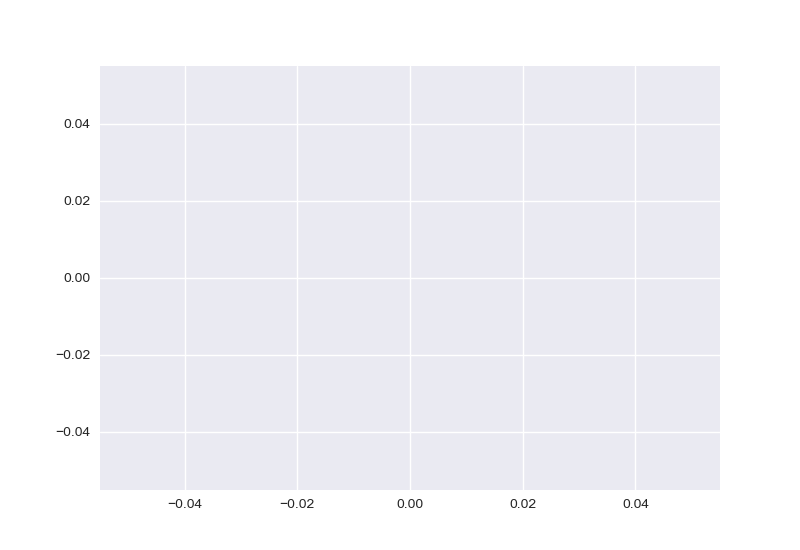

In [41]:
plt.figure()
plt.scatter(df['Lat'], df['Lon'], c=df['L1_fCO2'], cmap='jet')

# Jointplot

<IPython.core.display.Javascript object>


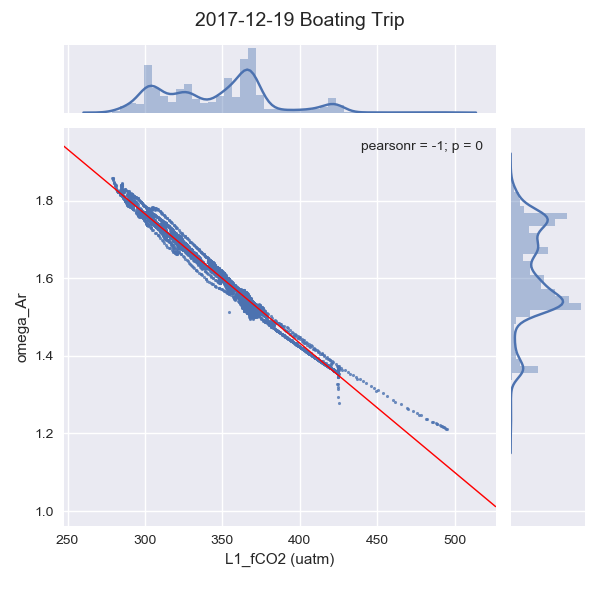

/Users/Mike/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<IPython.core.display.Javascript object>


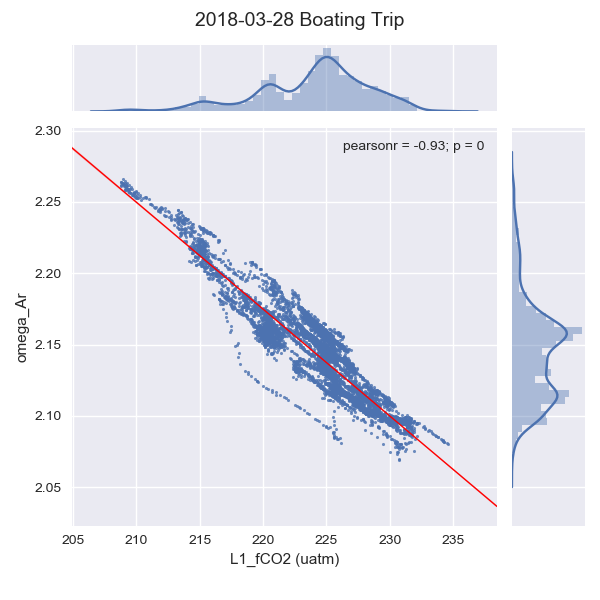

<IPython.core.display.Javascript object>


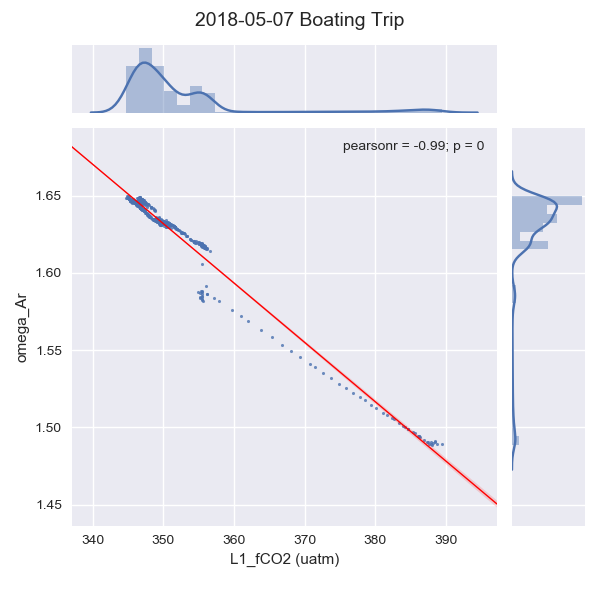

In [107]:
csvs = ['FLO_L3_CascoBay20171219_revised.csv', 'FLO_L3_CascoBay20180328.csv', 'FLO_L3_CascoBay20180507.csv']
titles = ['2017-12-19 Boating Trip', '2018-03-28 Boating Trip', '2018-05-07 Boating Trip']



for i, csv in enumerate(csvs):

    df = pd.read_csv(csv)
    df = df[['Lat', 'Lon', 'secDay', 'L1_fCO2', 'L2_fCO2', 'sal', 'omega_Ar']]
    
    # filters out all the values that are -9999
    df.replace(-9999, np.NaN, inplace=True)
    df.dropna(inplace=True)
    # scratch outliers
    df = df[(df['L1_fCO2'] > 100) & 
            (df['L1_fCO2'] < 600)]
    
    # bounds df to 300m from the kelp farm
    df = df[(df['Lat'] < boundary[0]) & 
        (df['Lat'] > boundary[1]) & 
        (df['Lon'] < boundary[2]) & 
        (df['Lon'] > boundary[3])]
    
    # plots the graph
#     if i == 0:
#         sns.jointplot(x='omega_Ar', y='L1_fCO2', data=df, kind='reg', scatter_kws={'s': 5}, line_kws={'color': 'red', 'linewidth': 1})
#     else:
#         sns.jointplot(x='omega_Ar', y='L1_fCO2', data=df, kind='reg', scatter_kws={'s': 5}, line_kws={'color': 'red', 'linewidth': 1})
    
    
    sns.jointplot(x='L1_fCO2', y='omega_Ar', data=df, kind='reg', scatter_kws={'s': 5}, 
                  line_kws={'color': 'red', 'linewidth': 1})
    
    plt.xlabel('L1_fCO2 (uatm)')
    
    plt.suptitle(titles[i], fontsize=14)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

<IPython.core.display.Javascript object>


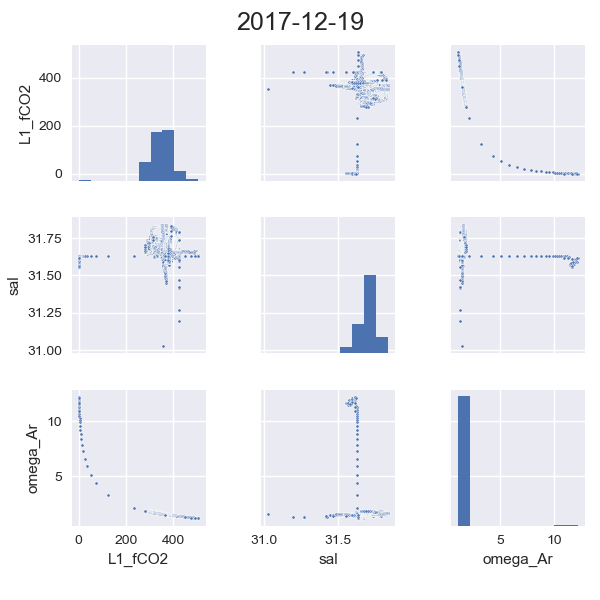

<IPython.core.display.Javascript object>


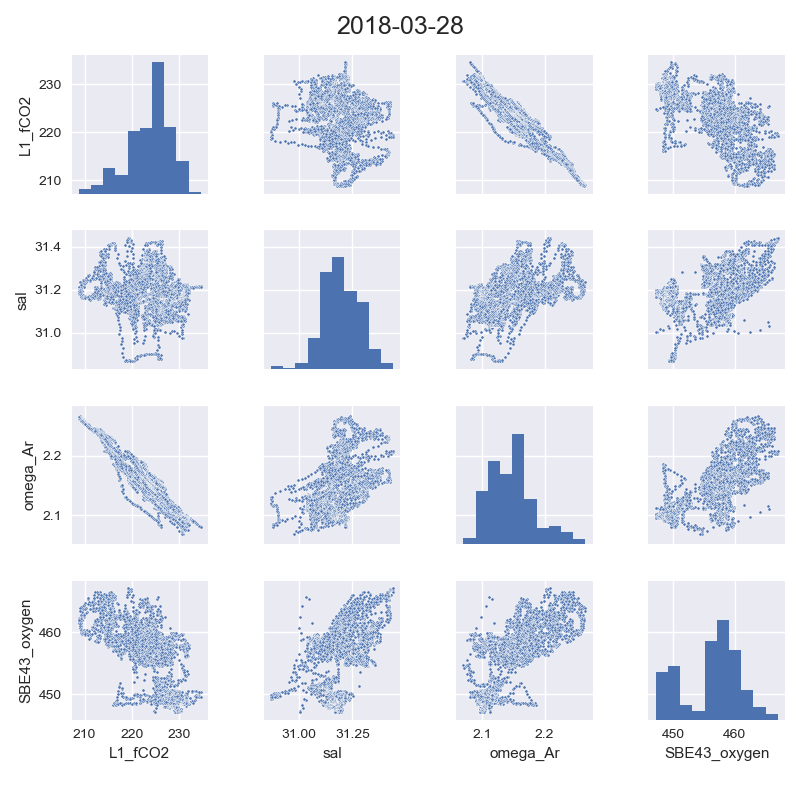

<IPython.core.display.Javascript object>


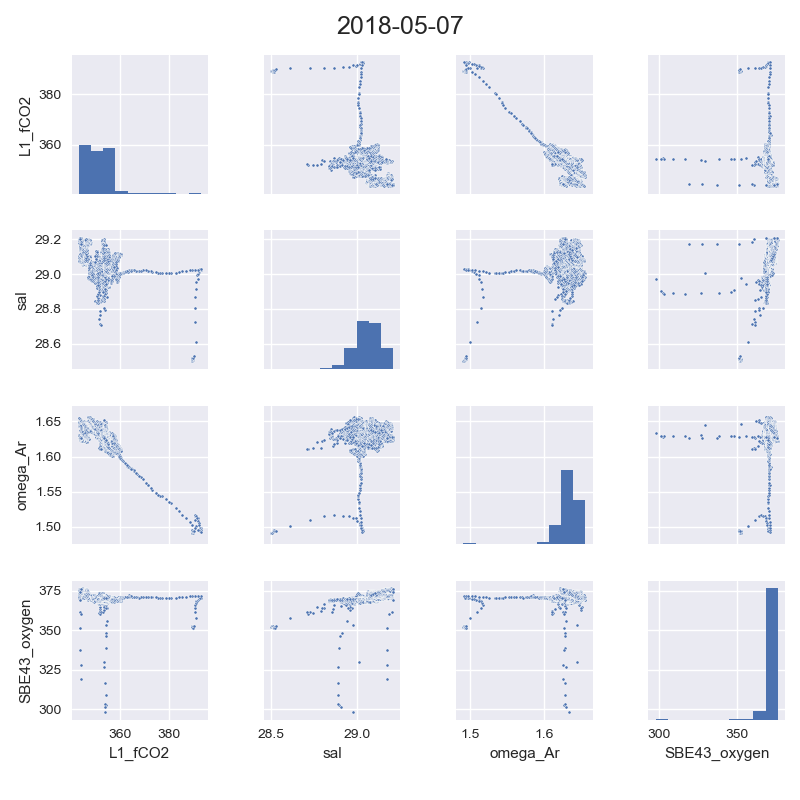

In [71]:
csvs = ['FLO_L3_CascoBay20171219_revised.csv', 'FLO_L3_CascoBay20180328.csv', 'FLO_L3_CascoBay20180507.csv']
titles = ['2017-12-19', '2018-03-28', '2018-05-07']

for i, csv in enumerate(csvs):
    df = pd.read_csv(csv)
    
    interested_columns = ['L1_fCO2', 'sal', 'omega_Ar', 'SBE43_oxygen']
    
    # This one doesn't have SBE43 Oxygen
    if csv == 'FLO_L3_CascoBay20171219_revised.csv':
        interested_columns.remove('SBE43_oxygen') 
    
    df = df[interested_columns]
    
    # filters out all the values that are -9999
    df.replace(-9999, np.NaN, inplace=True)
    df.dropna(inplace=True)
    
    
    # plots the graph
    sns.pairplot(df, size=2, plot_kws=dict(s=5))
    plt.suptitle(titles[i], fontsize=18)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [10]:
df.columns

Index(['L1_fCO2', 'sal', 'omega_Ar', 'SBE43_oxygen'], dtype='object')

# Distributions of all the datasets

In [44]:
# bounding the data

NW = (-70.14655, 43.72273)
NE = (-70.14619, 43.72253)
SE = (-70.14876, 43.72015)
SW = (-70.14911, 43.72035)
corners = [NW, NE, SE, SW]

def get_boundary_box(corners, R=6378137):
    '''
    Corners follow the order NW, NE, SE, SW, (longitude, latitude)
    
    returns: upperbound, lower bound, right bound, left bound
    '''
    northmost = max(corners, key=lambda x: x[0])
    southmost = min(corners, key=lambda x: x[0])
    eastmost = max(corners, key=lambda x: x[1])
    westmost = min(corners, key=lambda x: x[1])  
    
    def get_coords_from_offsets(dn, de, coord):
        
        lon, lat = coord
        
        #Coordinate offsets in radians
        dLat = dn/R
        dLon = de/(R*np.cos(np.pi*lat/180))

        #//OffsetPosition, decimal degrees
        latO = lat + dLat * 180/np.pi
        lonO = lon + dLon * 180/np.pi 
        return (lonO, latO)
    
    # offsets in meters for north
    dn = 300
    de = 0
    
    _, north_lat = get_coords_from_offsets(dn, de, northmost)
    
    # offsets in meters for south
    dn = -300
    de = 0
    
    _, south_lat = get_coords_from_offsets(dn, de, southmost)
    
    # offsets in meters for east
    dn = 0
    de = 300
    
    east_lon, _ = get_coords_from_offsets(dn, de, eastmost)
    
    # offsets in meters for east
    dn = 0
    de = -300
    
    west_lon, _ = get_coords_from_offsets(dn, de, westmost)
    
#     corners = [(west_lon, north_lat), (east_lon, north_lat), (west_lon, south_lat), (east_lon, south_lat)]
    
    return [north_lat, south_lat, east_lon, west_lon]

In [45]:
get_boundary_box(corners)

[43.72522494585236, 43.71765505414764, -70.14282096730264, -70.152488872116109]

In [66]:
# pd.read_csv('FLO_L3_20170317.csv', skiprows=[1])['sw pCO2 (uatm)']
paths = ['FLO_L3_20170317.csv', 'FLO_L3_20170502.csv', 'FLO_L3_CascoBay20171219_revised.csv', 
         'FLO_L3_CascoBay20180328.csv', 'FLO_L3_CascoBay20180507.csv']
co2_labels = ['sw pCO2 (uatm)'] * 2 + ['L1_fCO2'] * 3
dfs = [pd.read_csv(p, skiprows=[1])[['Lat', 'Lon', co2_label]] for (p, co2_label) in zip(paths, co2_labels)]
dfs = [df.replace(-9999, np.nan).dropna() for df in dfs]

In [67]:
boundary = get_boundary_box(corners)
temp_dfs = []
for df, co2_label in zip(dfs, co2_labels):
    
    # bounds df to 300m from the kelp farm
    df = df[(df['Lat'] < boundary[0]) & 
        (df['Lat'] > boundary[1]) & 
        (df['Lon'] < boundary[2]) & 
        (df['Lon'] > boundary[3])]
    
    # removes outliers
    m = 2 # number of standard deviations away
    z_scores = (df[co2_label] - df[co2_label].mean()) / df[co2_label].std()
    df = df[z_scores < m] 
    
    temp_dfs.append(df)
dfs = temp_dfs

In [68]:
[len(df) for df in dfs]

[551, 430, 7652, 6604, 5299]

<IPython.core.display.Javascript object>


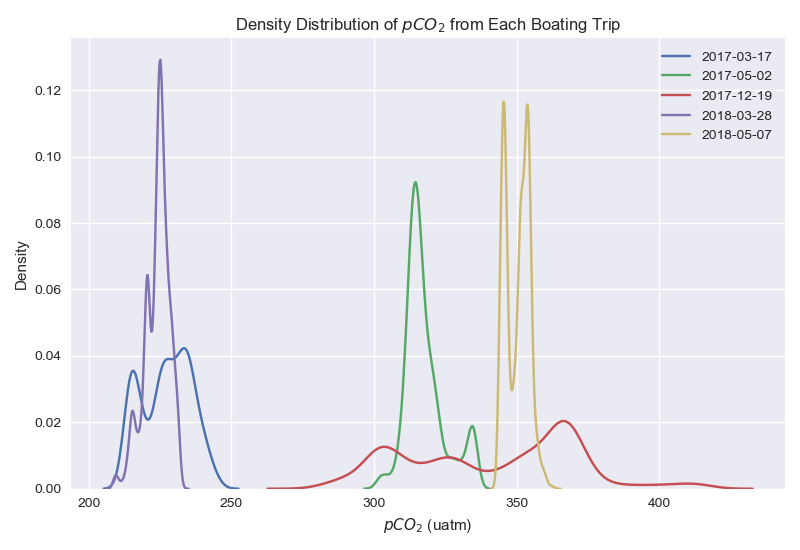

In [69]:
plt.figure()
[sns.kdeplot(df[label]) for df, label in zip(dfs, co2_labels)]
dates = ['2017-03-17', '2017-05-02', '2017-12-19', '2018-03-28', '2018-05-07']
plt.legend(dates)

plt.xlabel('$pCO_2$ (uatm)')
plt.ylabel('Density')
plt.title('Density Distribution of $pCO_2$ from Each Boating Trip')
plt.tight_layout()

In [50]:
datas = [pd.DataFrame(np.vstack([df.values[:, -1:].ravel(), [date]*len(df)]).T, 
                      columns=['data', 'Date']) for df, date in zip(dfs, dates)]
datas = pd.concat(datas).reset_index(drop=True)
datas['data'] = datas['data'].astype(float)

In [51]:
datas.head()

,data,Date
0,221.032418,2017-03-17
1,220.719464,2017-03-17
2,220.237699,2017-03-17
3,220.288356,2017-03-17
4,220.401617,2017-03-17


<IPython.core.display.Javascript object>


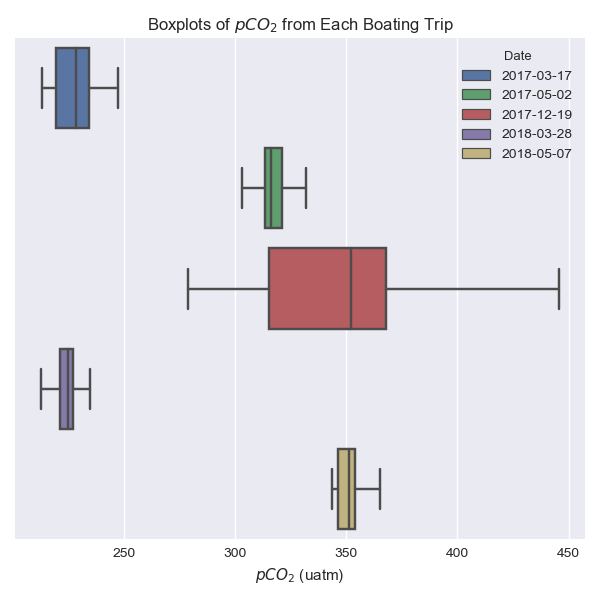

In [65]:
plt.figure(figsize=(6, 6))
# [plt.boxplot(df[label]) for df, label in zip(dfs, co2_labels)]

sns.boxplot(y='Date', x='data', data=datas, orient='h', showfliers=False, hue='Date', dodge=False)

# legends = ['2017-03-17', '2017-05-02', '2017-12-19', '2018-03-28', '2018-05-07']
# plt.legend(legends)

# plt.xlabel('$pCO_2$ (uatm)')
# plt.ylabel('Density')
plt.xlabel('$pCO_2$ (uatm)')
plt.ylabel('')
plt.title('Boxplots of $pCO_2$ from Each Boating Trip')
plt.tick_params(
    axis='y',          # changes apply to the y-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the left edge are off
    right=False,         # ticks along the right edge are off
    labelleft=False) # labels along the left edge are off

plt.tight_layout()

In [20]:
dfs[0]

,Lat,Lon,sw pCO2 (uatm)
133,43.722070,-70.151826,221.032418
134,43.721982,-70.151133,220.719464
135,43.721909,-70.150440,220.237699
136,43.721851,-70.149860,220.288356
137,43.721791,-70.149340,220.401617
138,43.721727,-70.148854,220.545469
139,43.721652,-70.148429,220.678775
140,43.721538,-70.148007,220.802614
141,43.721441,-70.147661,220.012901
142,43.721381,-70.147467,218.473644


In [21]:
[len(df) for df in dfs]

[559, 446, 8105, 6625, 5410]

In [22]:
dfs[2]

,Lat,Lon,L1_fCO2
23,43.722583,-70.150050,356.575607
24,43.722582,-70.150050,357.099714
25,43.722580,-70.150033,357.057691
26,43.722580,-70.150033,357.437385
27,43.722580,-70.150033,356.773495
28,43.722578,-70.150033,357.126875
29,43.722578,-70.150033,357.090864
30,43.722577,-70.150033,357.157585
31,43.722577,-70.150017,356.961875
32,43.722575,-70.150017,357.123528
